In [1]:
import h5py
import numpy as np
import rewritten as rw
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import reciprocalVolume

In [37]:
# X1 = (1, 0, 0)
# X2 = (0, 1, 0)
# X3 = (0, 0, 1)

X1 = (0, 0, 1)
X2 = (1, 0, 0)
X3 = (0, 1, 0)

conv = rw.GeometryConverter(
    rot=np.pi * np.array([0, 0, 0]),
    X1=X1,
    X2=X2,
    X3=X3,
    clen=0.13,
    poni=(0.048, 0.048, 0),
    pixels=(80, 80),
    pixel_size=(0.0012, 0.0012),
    beam_center=(0.048, 0.048),
    wavelength=12.398 / 4.95 * 1e-10,
)
print("Running diffraction simulation...")
volume = reciprocalVolume.run(conv)

Running diffraction simulation...
Done.


In [39]:
result = conv.back_to_detector(
    conv.lab_to_reciprocal(
        conv.detector_to_lab(
            np.moveaxis(np.meshgrid(np.arange(80), np.arange(80)), 0, -1)
        )
    ),
    volume,
)

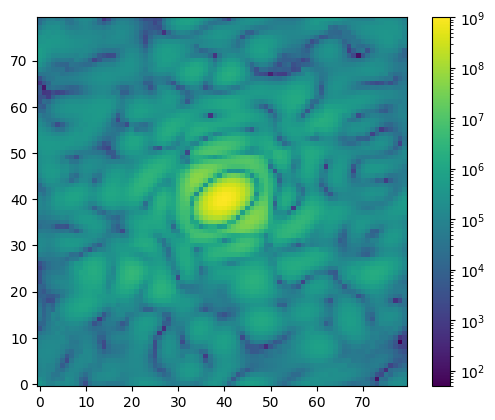

In [40]:
plt.imshow(result, origin="lower", norm=colors.LogNorm())
q = plt.colorbar()